# Lection3

## Deep Learning Regression

<img src="../img/00-how-a-network-learns.png" width=600px>

[Tensorflow documentation](https://www.tensorflow.org/api_docs/python/tf)

[Daniel Bourke video 1](https://www.youtube.com/watch?v=tpCFfeUEGs8&t=0s)

[Daniel Bourke video 2](https://www.youtube.com/watch?v=ZUKz4125WNI&t=0s)

[Daniel Bourke github repo](https://github.com/mrdbourke/tensorflow-deep-learning/)





# Plan

1. Import TensorFlow
2. Data preparation
3. Modeling
4. Evaluation & Improving
5. Model save & load

In [6]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt

In [11]:
X= np.array(range(1,100)).astype(np.float32)

X = tf.constant(X)
X.dtype

tf.float32

In [12]:
y = tf.constant(0.5*X+1)

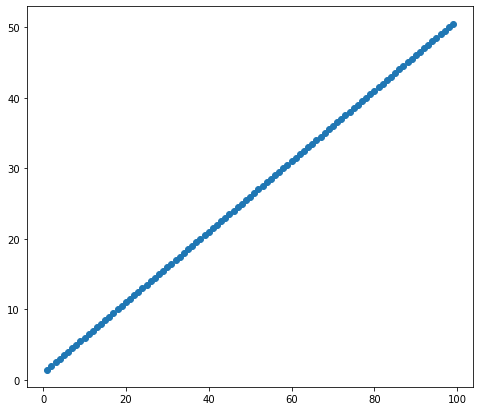

In [15]:
plt.figure(figsize=(8,7))
plt.scatter(X,y)

In [16]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=1.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.5>)

In [42]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import mae ,mse
from tensorflow.keras.optimizers import SGD, Adam

tf.random.set_seed(49)

model = Sequential([
    Dense(10), 
    Dense(1)
]
)

model.compile(
    loss=mae, 
    optimizer=SGD(), 
    metrics=[mae,mse]
)

In [43]:
history = model.fit(X,y, epochs=5)

Epoch 1/5
4/4 [==============================] - 1s 2ms/step - loss: 26.0255 - mean_absolute_error: 26.0255 - mean_squared_error: 1403.9811
Epoch 2/5
4/4 [==============================] - 0s 6ms/step - loss: 15.8066 - mean_absolute_error: 15.8066 - mean_squared_error: 431.1795
Epoch 3/5
4/4 [==============================] - 0s 3ms/step - loss: 15.0518 - mean_absolute_error: 15.0518 - mean_squared_error: 347.3870
Epoch 4/5
4/4 [==============================] - 0s 3ms/step - loss: 13.3148 - mean_absolute_error: 13.3148 - mean_squared_error: 332.4873
Epoch 5/5
4/4 [==============================] - 0s 3ms/step - loss: 18.8626 - mean_absolute_error: 18.8626 - mean_squared_error: 484.0383


In [44]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [45]:
y_hat=model.predict([20])

y[20], y_hat

(<tf.Tensor: shape=(), dtype=float32, numpy=11.5>,
 array([[6.722017]], dtype=float32))

In [46]:
X_train=X[:80]
y_train=y[:80]
X_test=X[80:]
y_test=y[80:]

Text(0.5, 1.0, 'Train & test data')

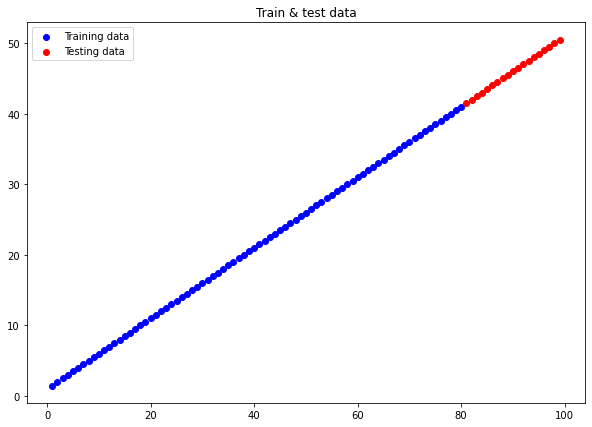

In [50]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='r', label='Testing data')
# Show the legend
plt.legend();
plt.title('Train & test data')

In [53]:
tf.random.set_seed(49)

model2 = Sequential([
    Dense(10), 
    Dense(1)
]
)

model2.compile(
    loss=mae, 
    optimizer=SGD(), 
    metrics=[mae,mse]
)

In [54]:
history2=model2.fit(X_train,y_train, 
           validation_data=(X_test,y_test), 
           epochs=5)

Epoch 1/5
3/3 [==============================] - 1s 166ms/step - loss: 19.2378 - mean_absolute_error: 19.2378 - mean_squared_error: 703.6271 - val_loss: 62.0948 - val_mean_absolute_error: 62.0948 - val_mean_squared_error: 3870.4968
Epoch 2/5
3/3 [==============================] - 0s 20ms/step - loss: 17.3382 - mean_absolute_error: 17.3382 - mean_squared_error: 537.5012 - val_loss: 46.8533 - val_mean_absolute_error: 46.8533 - val_mean_squared_error: 2203.0215
Epoch 3/5
3/3 [==============================] - 0s 26ms/step - loss: 13.7532 - mean_absolute_error: 13.7532 - mean_squared_error: 274.0124 - val_loss: 28.4501 - val_mean_absolute_error: 28.4501 - val_mean_squared_error: 812.2010
Epoch 4/5
3/3 [==============================] - 0s 39ms/step - loss: 9.8215 - mean_absolute_error: 9.8215 - mean_squared_error: 186.1229 - val_loss: 21.3213 - val_mean_absolute_error: 21.3213 - val_mean_squared_error: 456.1305
Epoch 5/5
3/3 [==============================] - 0s 31ms/step - loss: 6.8126 - 

In [59]:
y_hat = model.predict(X_test)
y_hat2 = model2.predict(X_test)



Text(0.5, 1.0, 'Model2 results')

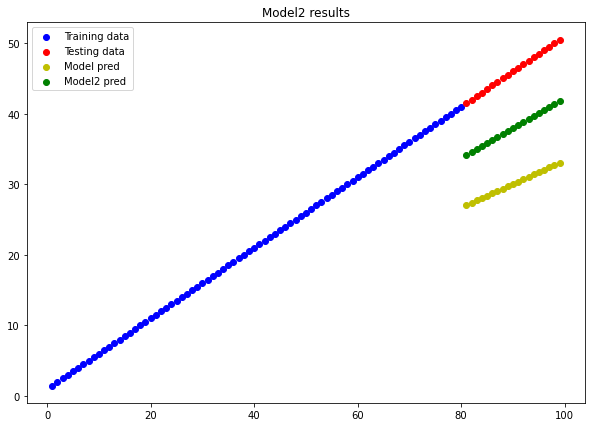

In [60]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='r', label='Testing data')
plt.scatter(X_test, y_hat, c='y', label='Model pred')
plt.scatter(X_test, y_hat2, c='g', label='Model2 pred')
# Show the legend
plt.legend();
plt.title('Model2 results')

In [61]:
import pandas as pd

<AxesSubplot:>

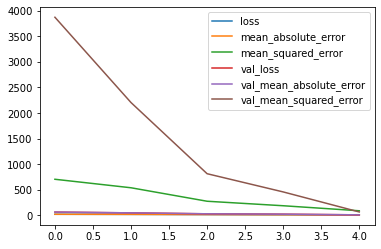

In [62]:
pd.DataFrame(history2.history).plot()

In [63]:
model3 = model2

In [64]:
history3=model3.fit(X_train,y_train, 
           validation_data=(X_test,y_test), 
           epochs=50, 
           verbose=0)

<AxesSubplot:>

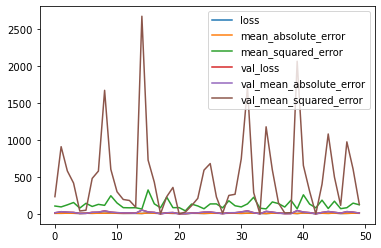

In [65]:
pd.DataFrame(history3.history).plot()

In [66]:
y_hat3=model3.predict(y_test)

Text(0.5, 1.0, 'Model1-3 results')

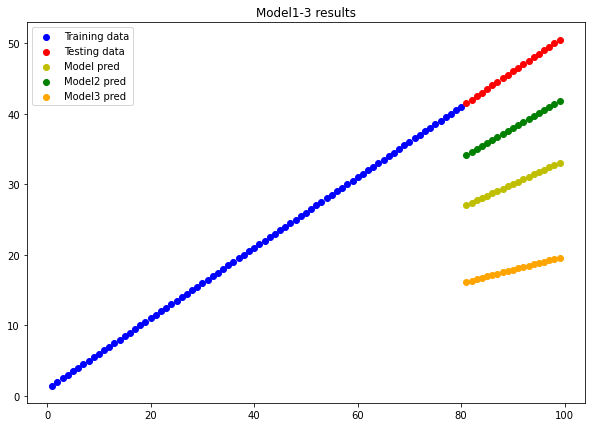

In [68]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='r', label='Testing data')
plt.scatter(X_test, y_hat, c='y', label='Model pred')
plt.scatter(X_test, y_hat2, c='g', label='Model2 pred')
plt.scatter(X_test, y_hat3, c='orange', label='Model3 pred')
# Show the legend
plt.legend();
plt.title('Model1-3 results')

In [69]:
insurance=pd.read_csv('insurance.csv')

In [70]:
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [73]:
insurance_ohe = pd.get_dummies(insurance)

In [74]:
insurance_ohe.head()

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0


In [75]:
X = insurance_ohe.drop('expenses', axis=1)
y= insurance_ohe['expenses']

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=49)

In [105]:
tf.random.set_seed(49)

model_ins = Sequential([
    Dense(11), 
    Dense(10),
    Dense(1)
]
)

model_ins.compile(
    loss=mae, 
    optimizer=SGD(), 
    metrics=[mae]
)

In [112]:
ins_history=model_ins.fit(X_train,y_train, 
            validation_data=(X_test,y_test),
            batch_size=32, 
            epochs=50, 
            verbose=0)

In [108]:
model_ins.evaluate(X_test)

9/9 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - mean_absolute_error: 0.0000e+00


[0.0, 0.0]

<AxesSubplot:>

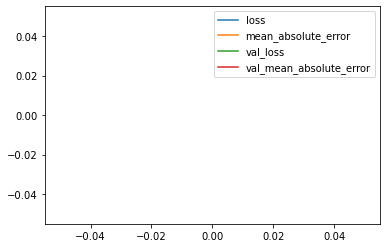

In [104]:
pd.DataFrame(ins_history.history).plot()

In [110]:
X_train.shape

(1070, 11)

In [113]:
1070/32

33.4375

In [111]:
X_train.head(2)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
853,53,23.8,2,1,0,1,0,1,0,0,0
1151,58,36.5,0,1,0,1,0,0,1,0,0
